In [6]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,8)
plt.rcParams['font.size'] = 18

mu0 = 4*np.pi*1e-7
elemCharge = 1.60217662e-19
Me = 9.1094e-31
Mp = 1.6726e-27

In [9]:
# We define the particle class
class Particle:
    def __init__(self, mass, charge):
        self.mass = mass
        self.charge = charge
        self.r = np.zeros((3), dtype='float64')
        self.v = np.zeros((3), dtype='float64')

    def initPos(self, x, y, z):
        self.r[:] = (x, y, z)

    def initSpeed(self, vx, vy, vz):
        self.v[:] = (vx, vy, vz)

    def push(self, dt, E, B):
        """
        Push the particles using Boris' method: updates position and speed of
        the particle.
        Input:  Timestep (float32)
                Electric field at the particle's position (Numpy((3), dtype='float32'))
                Magnetic field at the particle's position (Numpy((3), dtype='float32'))
        """
        # Updating speed

        ## Adding half of the magnetic impulse
        self.v += self.charge * E * dt / (2 * self.mass)

        ## Rotation of speed according to B
        t = self.charge * dt * B / (2 * self.mass)
        v1 = self.v + np.cross(self.v, t)
        self.v += np.cross(v1, 2 /(1 + np.abs(t)**2) * t)

        ## Adding second half of the magnetic impulse
        self.v += self.charge * E * dt / (2 * self.mass)

        # Updating position
        self.r += dt * self.v


N = 1       # Number of particles

# Parameters and fields
charge = elemCharge
mass = Mp
E0 = np.array((0, 0, 0))
B0 = np.array((0, 0, 1))
w0 = np.abs(charge) * np.sqrt(np.sum(B0*B0, axis=0)) / mass
dt = 0.001 / w0       # timestep
Np = 10             # Number of cyclotronic periods

Tf = Np * 2 * np.pi / w0
Nt = int(Tf // dt)  # Number of timesteps
t = np.arange(0, Nt)*dt
x, y, z = np.zeros((Nt)), np.zeros((Nt)), np.zeros((Nt))    # positions taken by the particle along
vx, vy, vz = np.zeros((Nt)), np.zeros((Nt)), np.zeros((Nt))   # velocities

part = Particle(mass, charge)
part.initPos(0, 0, 0)
part.initSpeed(200, 0, 0)

for i in range(Nt):
    part.push(dt, E0, B0)
    x[i], y[i], z[i] = part.r
    vx[i], vy[i], vz[i] = part.v

# Diagnostics (To find errors)
E = 0.5 * mass * (vx**2 + vy**2 + vz**2)
vx_th = 200 * np.cos(w0*t)
vx_error = np.abs(vx - vx_th)
print(vx_error.max() / vx.max())
vy_th = 200 * np.sin(w0*t + np.pi)
vy_error = np.abs(vy - vy_th)
print(vy_error.max() / vy.max())

0.000999869000293381
0.000999999751411828


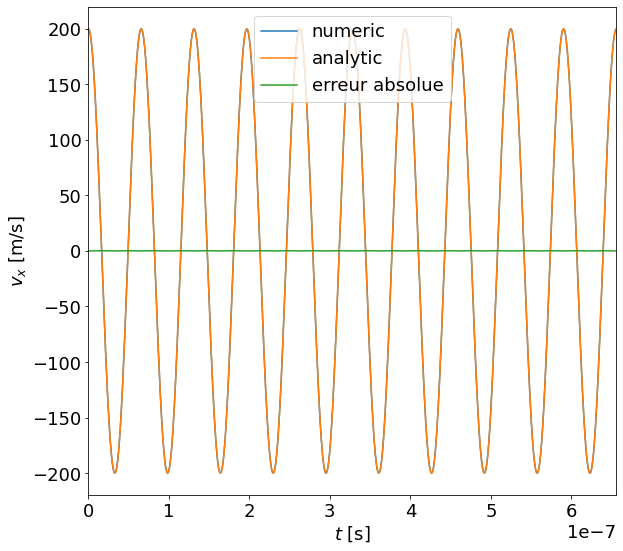

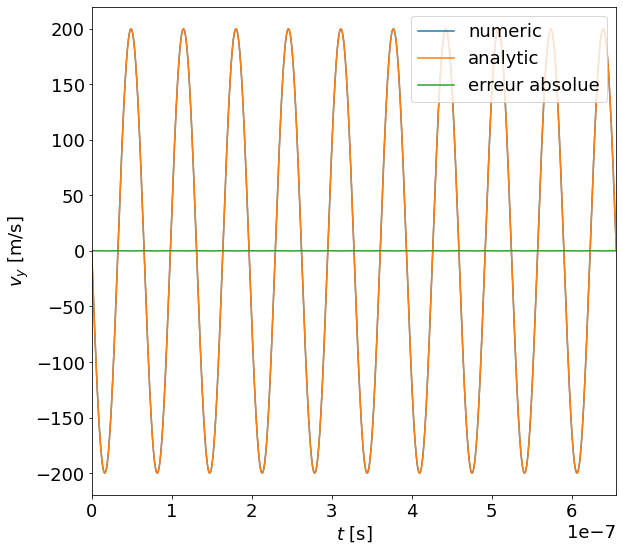

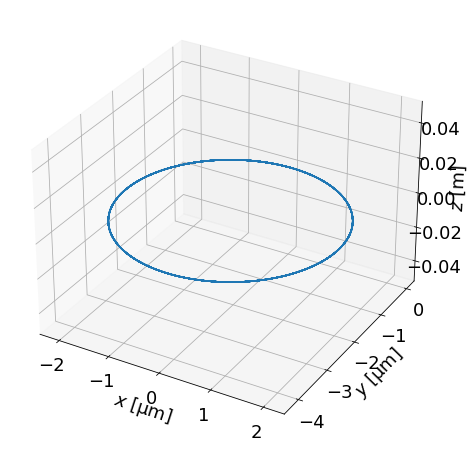

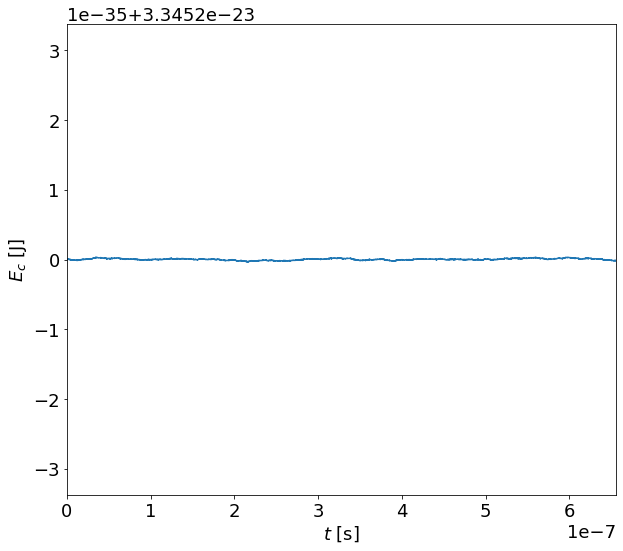

In [10]:


# Outputs
## Speed along x
plt.plot(t, vx, label='numeric')
plt.plot(t, vx_th, label='analytic')
plt.plot(t, vx_error, label='erreur absolue')
plt.xlabel('$t$ [s]')
plt.ylabel('$v_x$ [m/s]')
plt.legend()
plt.xlim((t[0], t[-1]))
plt.tight_layout()
# plt.savefig('test_vx.png')
plt.show()

## Speed along y
plt.plot(t, vy, label='numeric')
plt.plot(t, vy_th, label='analytic')
plt.plot(t, vy_error, label='erreur absolue')
plt.xlabel('$t$ [s]')
plt.ylabel('$v_y$ [m/s]')
plt.legend()
plt.xlim((t[0], t[-1]))
plt.tight_layout()
# plt.savefig('test_vy.png')
plt.show()

## 3D trajectory
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x*1e6, y*1e6, z)
ax.set_xlabel('$x$ [µm]')
ax.set_ylabel('$y$ [µm]')
ax.set_zlabel('$z$ [m]')
# plt.savefig('test_3d.png')
plt.show()

## Energy vs. time
plt.plot(t, E)
plt.xlabel('$t$ [s]')
plt.ylabel('$E_c$ [J]')
plt.xlim((t[0], t[-1]))
plt.tight_layout()
# plt.savefig('test_E.png')

In [12]:
t = np.array([1,2,3])
t**2

array([1, 4, 9])